# Modélisation des données en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> 
# Analyse des Données de la Ligue 1 (2024-2025)

                            Auteur du projet : Evan GUILLON

#### Résumé
Bonjour à tous et bienvenue dans cette analyse exploratoire des données de la Ligue 1 (2024-2025) ! </br>
A travers les résultats de la précédente saison de la ligue des talents, nous allons, à travers les données, chercher à comprendre ce qui a permis un meilleur classement à certaines équipes contrairement aux autres !

## Introduction
Nos données sont issues de [Football-Data.co.uk](https://www.football-data.co.uk/francem.php?utm_source=chatgpt.com), celles ci sont libres de droit et me permettent ainsi de réaliser cette analyse. </br></br>
Ces données complètes mais également complèxes nécessitent une explication des variables :

**Données globales** :
1. Date : Date du match (jj/mm/aa)
2. Time : Heure du coup d’envoi
3. HomeTeam : Équipe à domicile
4. AwayTeam : Équipe à l’extérieur
</br></br>
**Résultats finaux** :</br></br>
&nbsp;&nbsp; 5. FTHG : Buts de l’équipe à domicile à la fin du match</br>
&nbsp;&nbsp; 6. FTAG : Buts de l’équipe à l’extérieur à la fin du match</br>
&nbsp;&nbsp; 7. FTR : Résultat final (H = victoire domicile, D = match nul, A = victoire extérieur)
</br></br></br>
**Résultats à la mi-temps** :</br></br>
&nbsp;&nbsp; 8. HTHG : Buts de l’équipe à domicile à la mi-temps</br>
&nbsp;&nbsp; 9. HTAG : Buts de l’équipe à l’extérieur à la mi-temps</br>
&nbsp;&nbsp; 10. HTR : Résultat à la mi-temps (H = victoire domicile, D = match nul, A = victoire extérieur)
</br></br></br>
**Statistiques du match** :</br></br>
&nbsp;&nbsp; 11. HS : Tirs de l’équipe à domicile</br>
&nbsp;&nbsp; 12. AS : Tirs de l’équipe à l’extérieur</br>
&nbsp;&nbsp; 13. HST : Tirs cadrés de l’équipe à domicile</br>
&nbsp;&nbsp; 14. AST : Tirs cadrés de l’équipe à l’extérieur</br>
&nbsp;&nbsp; 15. HC : Corners pour l’équipe à domicile</br>
&nbsp;&nbsp; 16. AC : Corners pour l’équipe à l’extérieur</br>
&nbsp;&nbsp; 17. HF : Fautes commises par l’équipe à domicile</br>
&nbsp;&nbsp; 18. AF : Fautes commises par l’équipe à l’extérieur</br>
&nbsp;&nbsp; 19. HY : Cartons jaunes pour l’équipe à domicile</br>
&nbsp;&nbsp; 20. AY : Cartons jaunes pour l’équipe à l’extérieur</br>
&nbsp;&nbsp; 21. HR : Cartons rouges pour l’équipe à domicile</br>
&nbsp;&nbsp; 22. AR : Cartons rouges pour l’équipe à l’extérieur


**Ainsi maintenant que nous avons observé les variables présentent dans cette base, nous allons pouvoir réaliser notre analyse exploratoire.**

# 1) Préparation des données

In [73]:
# Ici seront renseignées les bases de données utilisées pour ce projet

import pandas as pd          # Modèle classique utilisé pour la manipulation et l'analyse de données
import numpy as np           # Utilisé pour les calculs scientifique et la manipulation de tableaux
import matplotlib as mpl     # Package utiilisé pour créer des graphiques
import matplotlib.pyplot as plt
import seaborn as sns        # Utile pour la visualisation de données avec un meilleur design

from matplotlib import rcParams
from matplotlib.pyplot import figure

In [74]:
# On commence par charger le fichier csv
ligue1old=pd.read_csv('data.csv') # Importation des données
ligue1old  # On lit les données

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,F1,16/08/2024,19:45,Le Havre,Paris SG,1,4,A,0,1,...,1.93,2.00,1.95,1.97,1.95,2.02,1.89,1.95,1.95,2.02
1,F1,17/08/2024,16:00,Brest,Marseille,1,5,A,1,3,...,1.89,2.04,1.91,2.02,1.91,2.08,1.85,2.01,1.90,2.09
2,F1,17/08/2024,18:00,Reims,Lille,0,2,A,0,1,...,2.10,1.70,2.14,1.81,2.14,1.85,2.07,1.80,2.13,1.86
3,F1,17/08/2024,20:00,Monaco,St Etienne,1,0,H,1,0,...,2.00,1.93,2.00,1.93,2.00,2.01,1.95,1.91,1.95,2.00
4,F1,18/08/2024,14:00,Auxerre,Nice,2,1,H,1,1,...,1.82,2.11,1.82,2.13,1.83,2.17,1.77,2.10,1.84,2.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,F1,17/05/2025,20:00,Nantes,Montpellier,3,0,H,2,0,...,1.90,1.95,1.96,1.96,1.96,2.01,1.92,1.93,1.98,1.97
302,F1,17/05/2025,20:00,Nice,Brest,6,0,H,3,0,...,1.80,2.05,1.80,2.11,1.83,2.11,1.80,2.05,1.82,2.18
303,F1,17/05/2025,20:00,Paris SG,Auxerre,3,1,H,0,1,...,1.83,2.03,2.00,1.91,2.00,2.03,1.90,1.94,2.00,1.98
304,F1,17/05/2025,20:00,St Etienne,Toulouse,2,3,A,1,2,...,2.05,1.80,2.14,1.78,2.14,1.87,2.03,1.81,2.12,1.87


Comme nous pouvons le voir ci dessus, les données sont bien intégrées avec les 306 rencontres. Cependant il y a 119 variables, alors qu'en réalité nous voulons garder seulement **22 variables**. Cela s'explique par une non nécessité de certaines variables qui ne seront pas utilises dans notre analyse (telles que celles concernant les paris sportifs présentent à la fin). </br>
Pour cela, nous allons procéder au cleaning des variables.

In [75]:
# On liste les variables qu'on souhaite garder
colonnes_a_garder = [
    'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
    'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'
]

# Puis on filtre notre dataframe qu'on écrit dans un nouveau
ligue1 = ligue1old[colonnes_a_garder]

In [76]:
ligue1.head()  #<-- Pemet de lire les premières données

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,16/08/2024,19:45,Le Havre,Paris SG,1,4,A,0,1,A,...,2,9,2,8,9,9,3,0,0,0
1,17/08/2024,16:00,Brest,Marseille,1,5,A,1,3,A,...,5,5,5,0,10,8,4,1,0,0
2,17/08/2024,18:00,Reims,Lille,0,2,A,0,1,A,...,0,6,0,8,6,13,2,2,1,0
3,17/08/2024,20:00,Monaco,St Etienne,1,0,H,1,0,H,...,6,4,5,4,13,14,1,1,0,0
4,18/08/2024,14:00,Auxerre,Nice,2,1,H,1,1,D,...,7,2,3,5,11,17,0,0,0,0


Nous avons bien nos 22 variables souhaitées, nous pouvons donc passer à la prochaine étape de la préparation.

In [77]:
# Exploration des données
ligue1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      306 non-null    object
 1   Time      306 non-null    object
 2   HomeTeam  306 non-null    object
 3   AwayTeam  306 non-null    object
 4   FTHG      306 non-null    int64 
 5   FTAG      306 non-null    int64 
 6   FTR       306 non-null    object
 7   HTHG      306 non-null    int64 
 8   HTAG      306 non-null    int64 
 9   HTR       306 non-null    object
 10  HS        306 non-null    int64 
 11  AS        306 non-null    int64 
 12  HST       306 non-null    int64 
 13  AST       306 non-null    int64 
 14  HC        306 non-null    int64 
 15  AC        306 non-null    int64 
 16  HF        306 non-null    int64 
 17  AF        306 non-null    int64 
 18  HY        306 non-null    int64 
 19  AY        306 non-null    int64 
 20  HR        306 non-null    int64 
 21  AR        306 no

A présent, on explore les données à l'aide la commande info(). Nous pouvons maintenant visualiser nos données. Nous pouvons observer que 16 variables numériques tandis que les 6 autres sont catégorielles.

In [78]:
# Gestion des valeurs manquantes 

# On commence par vérifier s'il y a des valeurs manquantes dans chaque colonne
valeurs_manquantes = ligue1.isnull().sum()
# Ensuite, on affiche le nombre de valeurs manquantes par colonne
print(valeurs_manquantes)

Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


Il n'y a aucune valeur manquante dans notre base de données, ce qui nous permet de vérifier que celle-ci est complète et que nous n'avons pas besoin de faire un cleaning supplémentaire. Nous pouvons passer à la deuxième étape du projet.

# 2) Analyse Exploratoire des Données

Pour commencer, nous allons parcourir nos données en observant les caractéristiques des différentes variables à travers différentes méthodes. </br>
Dans un premier temps, quelles sont les équipes participant au championnat ?

In [79]:
Equipes = ligue1["HomeTeam"].unique() # Cela nous permet d'identifier les données uniques et ne pas garder les doublons
print(Equipes)

['Le Havre' 'Brest' 'Reims' 'Monaco' 'Auxerre' 'Angers' 'Montpellier'
 'Toulouse' 'Rennes' 'Paris SG' 'Lyon' 'Lille' 'St Etienne' 'Lens'
 'Nantes' 'Nice' 'Strasbourg' 'Marseille']


Parfait ! Nous avons maintenant nos 18 équipes. Nous allons pouvoir réaliser, par la suite, des tris croisés de ces équipes.</br>
Mais en fait, quel a été le classement final de la saison ? Réalisons le classement !

In [80]:
# --- Création du classement ---
teams = pd.concat([df["HomeTeam"], df["AwayTeam"]]).unique()
classement = pd.DataFrame(0, index=teams, columns=["Points", "MJ", "G", "N", "P", "BP", "BC", "DB"])

for _, row in df.iterrows():
    home, away = row["HomeTeam"], row["AwayTeam"]
    result, home_goals, away_goals = row["FTR"], row["FTHG"], row["FTAG"]

    # Matches joués
    classement.loc[home, "MJ"] += 1
    classement.loc[away, "MJ"] += 1

    # Buts
    classement.loc[home, "BP"] += home_goals
    classement.loc[home, "BC"] += away_goals
    classement.loc[away, "BP"] += away_goals
    classement.loc[away, "BC"] += home_goals

    # Différence
    classement["DB"] = classement["BP"] - classement["BC"]

    # Résultats
    if result == "H":
        classement.loc[home, "Points"] += 3
        classement.loc[home, "G"] += 1
        classement.loc[away, "P"] += 1
    elif result == "A":
        classement.loc[away, "Points"] += 3
        classement.loc[away, "G"] += 1
        classement.loc[home, "P"] += 1
    elif result == "D":
        classement.loc[home, "Points"] += 1
        classement.loc[away, "Points"] += 1
        classement.loc[home, "N"] += 1
        classement.loc[away, "N"] += 1

# Tri par ordre décroissant
classement = classement.sort_values(by=["Points", "DB"], ascending=[False, False])

# --- Créer la colonne Club depuis l'index ---
classement = classement.reset_index()
classement.rename(columns={"index": "Club"}, inplace=True)

# --- Créer la colonne Pos pour la position ---
classement.insert(0, "Pos", range(1, len(classement)+1))


# --- Fonction de mise en couleur par rang ---
def color_ranking(row):
    pos = row["Pos"]
    if pos <= 3:
        return ["background-color: darkblue; color: white"] * len(row)
    elif pos == 4:
        return ["background-color: lightblue; color: black"] * len(row)
    elif pos in [5, 6]:
        return ["background-color: orange; color: black"] * len(row)
    elif pos == 7:
        return ["background-color: lightgreen; color: black"] * len(row)
    elif pos == 16:
        return ["background-color: lightcoral; color: black"] * len(row)
    elif pos >= 17:
        return ["background-color: darkred; color: white"] * len(row)
    else:
        return [""] * len(row)


# On applique la mise en forme avec couleurs et points en gras ---
styled = (
    classement.style
    .hide(axis="index")  # <-- ceci supprime la colonne d'index
    .apply(color_ranking, axis=1)
    .set_properties(subset=["Points"], **{"font-weight": "bold"})
    .format({"Logo": path_to_image_html}, escape="html")
)

styled

Pos,Club,Points,MJ,G,N,P,BP,BC,DB
1,Paris SG,84,34,26,6,2,92,35,57
2,Marseille,65,34,20,5,9,74,47,27
3,Monaco,61,34,18,7,9,63,41,22
4,Nice,60,34,17,9,8,66,41,25
5,Lille,60,34,17,9,8,52,36,16
6,Lyon,57,34,17,6,11,65,46,19
7,Strasbourg,57,34,16,9,9,56,44,12
8,Lens,52,34,15,7,12,42,39,3
9,Brest,50,34,15,5,14,52,59,-7
10,Toulouse,42,34,11,9,14,44,43,1


Parfait ! Maintenant nous avons le classement final de la saison</br></br>
Maintenant nous allons observer en détail nos variables numériques et catégorielles

In [81]:
ligue1.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,1.607843,1.369281,0.692810,0.617647,13.336601,11.356209,4.964052,4.349673,4.911765,4.444444,11.928105,12.088235,1.800654,1.947712,0.104575,0.107843
std,1.346448,1.221758,0.831992,0.798081,5.249927,4.622175,2.676311,2.532144,2.688541,2.789650,3.496330,3.862649,1.191280,1.341840,0.317023,0.321070
min,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,3.000000,2.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,13.000000,11.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,7.000000,6.000000,7.000000,6.000000,14.000000,15.000000,3.000000,3.000000,0.000000,0.000000
max,8.000000,6.000000,6.000000,4.000000,37.000000,26.000000,14.000000,13.000000,17.000000,16.000000,24.000000,28.000000,6.000000,5.000000,2.000000,2.000000


array([[<AxesSubplot:title={'center':'FTHG'}>,
        <AxesSubplot:title={'center':'FTAG'}>,
        <AxesSubplot:title={'center':'HTHG'}>,
        <AxesSubplot:title={'center':'HTAG'}>],
       [<AxesSubplot:title={'center':'HS'}>,
        <AxesSubplot:title={'center':'AS'}>,
        <AxesSubplot:title={'center':'HST'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'HC'}>,
        <AxesSubplot:title={'center':'AC'}>,
        <AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'AF'}>],
       [<AxesSubplot:title={'center':'HY'}>,
        <AxesSubplot:title={'center':'AY'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'AR'}>]], dtype=object)

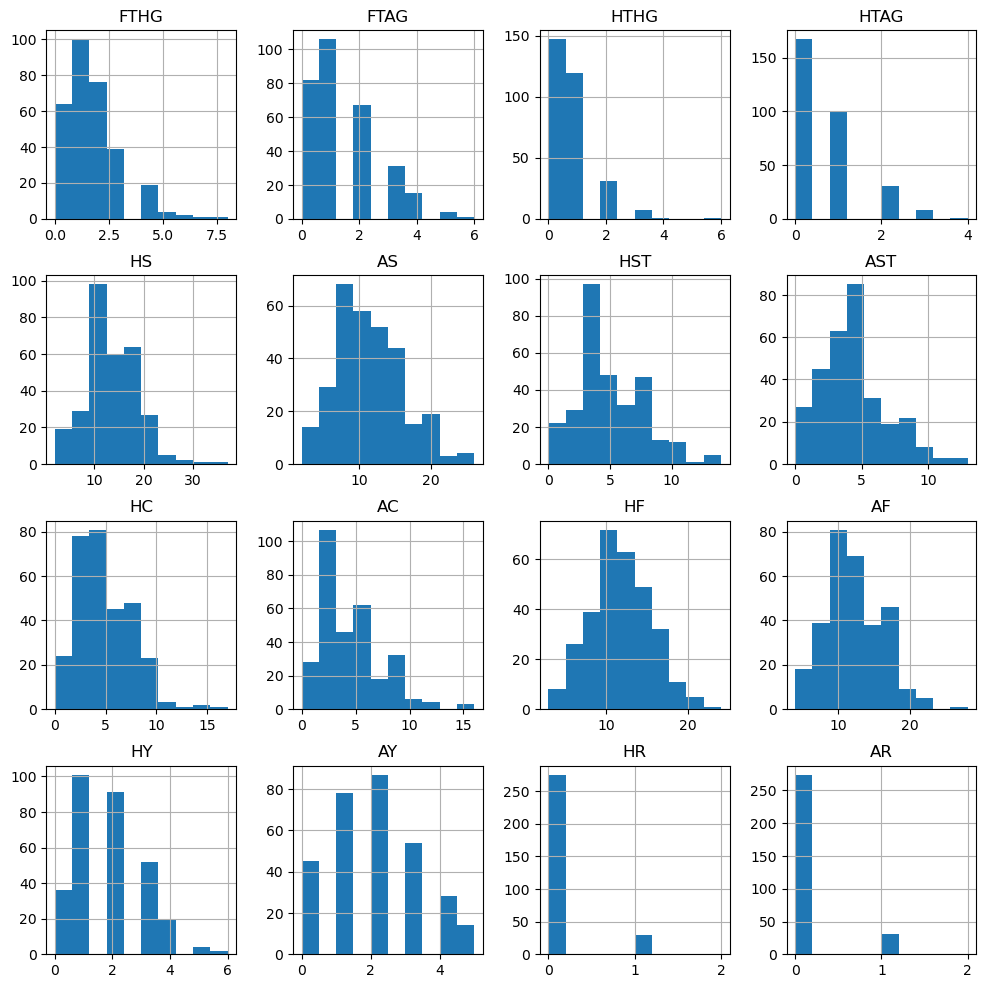

In [82]:
# Seconde analyse des variables numériques à travers des histogrammes
rcParams['figure.figsize'] = 12, 12
ligue1[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']].hist()

### Analyse des performances à domicile et à l’extérieur

Notre étude statistiques met en évidence des différences notables entre les matchs joués à domicile et ceux disputés à l’extérieur.

</br>

**Au niveau de la production offensive :**

    Buts marqués : la moyenne à domicile (1,61) est supérieure à celle à l’extérieur (1,37).
    Buts en première mi-temps : légère avance à domicile (0,69 vs 0,62).
    Buts en seconde mi-temps : l’écart se creuse davantage (0,92 vs 0,75).

Cela montre que la seconde période est la plus propice aux réalisations, et que l’appui du public joue probablement un rôle en faveur des équipes locales.

Ajoutons les indicateurs offensifs complémentaires :

    Tirs et tirs cadrés : plus nombreux à domicile, traduisant une plus grande prise d’initiative.
    Corners obtenus : également plus fréquents pour les équipes locales, conséquence logique d’une domination offensive.
</br>

**Au niveau de la discipline et de l'agressivité**

À l’inverse, sur le plan disciplinaire, les chiffres penchent du côté des visiteurs :

    Fautes commises : 3,50 à domicile contre 3,86 à l’extérieur.
    Cartons jaunes : 1,80 contre 1,95.
    Cartons rouges : 0,105 contre 0,108.

Ces écarts, bien que modestes, confirment une tendance : les équipes en déplacement commettent plus de fautes et de sanctions. Cela peut s’expliquer par plusieurs facteurs :

    - la pression du public local qui influence inconsciemment les arbitres,
    - la volonté des visiteurs de compenser un désavantage en jouant plus dur,
    - une fatigue accrue liée aux déplacements, menant à des fautes tardives ou maladroites.

</br>

**Conclusion :**
Les données confirment l’importance du facteur domicile : plus de buts, plus d’occasions créées, et un arbitrage parfois plus favorable. À l’inverse, les équipes en déplacement sont plus exposées à la sanction disciplinaire, traduisant à la fois la pression et l’intensité nécessaires pour rivaliser.

In [83]:
ligue1.select_dtypes(include=['object', 'category']).describe()

,Date,Time,HomeTeam,AwayTeam,FTR,HTR
count,306,306,306,306,306,306
unique,100,7,18,18,3,3
top,17/05/2025,16:00,Le Havre,Paris SG,H,D
freq,9,73,17,17,143,110


Voici des à présent nos variables catégorielles. Nous pouvons remarquer des infos qui pourront nous être utiles pour l'analyse plus tard. Mais nous allons plutôt regarder FTR et HTR, qui correspondent aux résultats à la mi temps et à la fin du match.

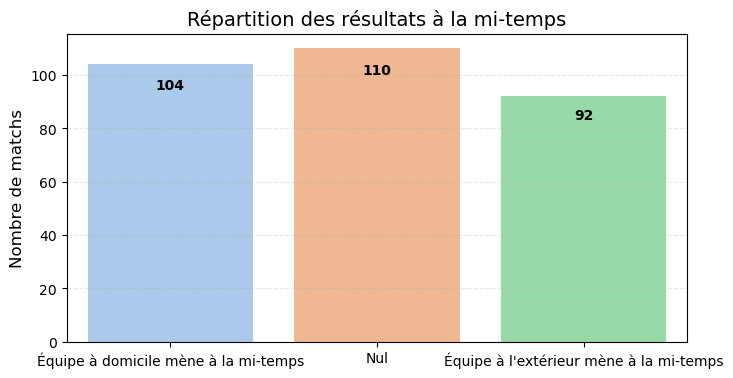

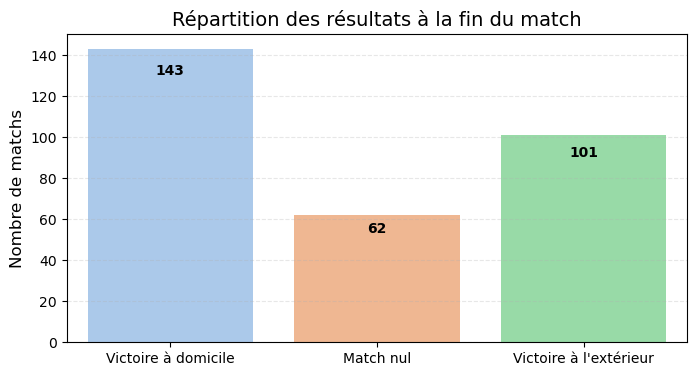

In [84]:
# Variables à tracer dans l'ordre voulu
vars_cat = ["HTR", "FTR"]

# Ordre des catégories dans les données
order = ["H", "D", "A"]

# Titres et labels personnalisés
titles = {
    "HTR": "Répartition des résultats à la mi-temps",
    "FTR": "Répartition des résultats à la fin du match"
}

x_labels = {
    "HTR": ["Équipe à domicile mène à la mi-temps", "Nul", "Équipe à l'extérieur mène à la mi-temps"],
    "FTR": ["Victoire à domicile", "Match nul", "Victoire à l'extérieur"]
}

for col in vars_cat:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=col, data=df, order=order, palette="pastel")
    
    # Ajouter les étiquettes en haut des barres (à l'intérieur)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f"{int(height)}", 
            (p.get_x() + p.get_width() / 2., height - 0.05 * height),
            ha="center", va="top", fontsize=10, color="black", fontweight="bold"
        )
    
    # Titres et labels
    plt.title(titles[col], fontsize=14)
    ax.set_xlabel("")  # supprime le label x par défaut
    ax.set_ylabel("Nombre de matchs", fontsize=12)
    
    # Remplacer les labels de l'axe X par les personnalisés
    ax.set_xticklabels(x_labels[col], rotation=0, fontsize=10)
    
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.show()

**À la mi-temps**, les équipes sont vraiment au coude à coude. Sur l’ensemble des matchs analysés, 110 se soldent par un **score nul**, contre 104 matchs où **l’équipe à domicile mène** et 92 où **l’équipe à l’extérieur prend l’avantage**. </br>Cette répartition montre que, durant la première moitié du match, aucune équipe ne domine de manière marquée et que le jeu reste très équilibré.  

Cependant, la situation **évolue radicalement en seconde mi-temps**. </br>
Les données montrent que les équipes à domicile profitent pleinement de cette période pour renverser ou conforter la situation. Le nombre de **victoires à domicile** passe de 104 à **143**, soit une augmentation notable de **39 matchs**. Les **victoires à l’extérieur** augmentent également, mais dans une moindre mesure, passant de 92 à 101 (+9). En parallèle, le nombre de **matchs nuls chute fortement**, passant de 110 à 62 (-48).  

Cette évolution confirme que la **seconde période est souvent décisive**, et qu’elle favorise particulièrement les équipes à domicile. Les résultats mettent en évidence l’importance de la gestion physique, tactique et mentale sur la durée complète du match : si l’équilibre règne à la mi-temps, la seconde période permet souvent de **faire la différence** et de transformer un match nul potentiel en victoire pour les équipes mieux préparées ou soutenues par leurs supporters.

# 3) Tris croisés

Bien que nous avons obersé nos premières données, nous allons commencer à rentrer dans le vif du sujet en croisant nos données. Nous comprenons maintenant les arguments pouvant impliquer des meilleurs résultats. Maintenant voyons dans le détail pour les équipes.

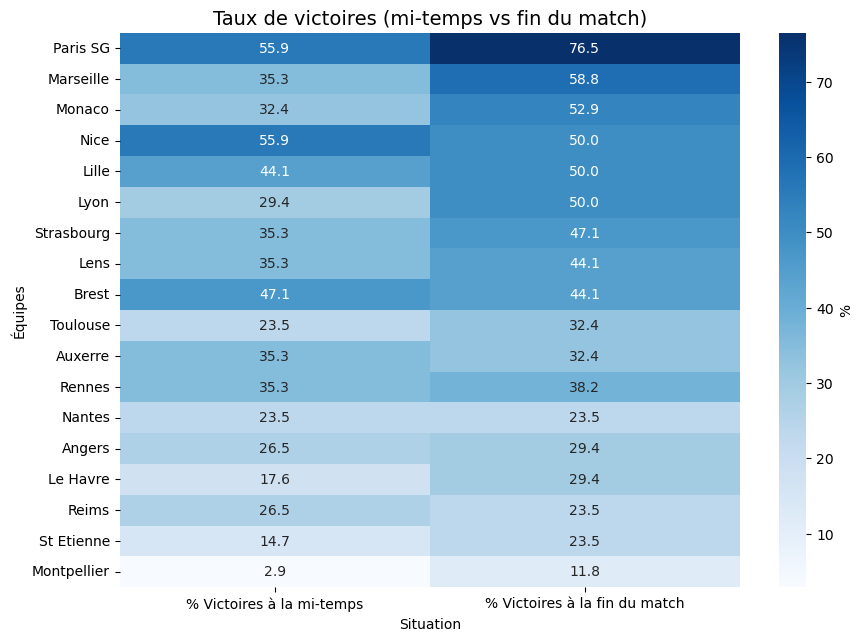

In [99]:
# Création du DataFrame pour les résultats globaux (domicile + extérieur)
teams = pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()
result = pd.DataFrame(index=teams)

# % Victoires à la mi-temps
result["% Victoires à la mi-temps"] = (
    (
        ((df["HTR"] == "H").groupby(df["HomeTeam"]).mean().fillna(0)) + 
        ((df["HTR"] == "A").groupby(df["AwayTeam"]).mean().fillna(0))
    ) / 2 * 100
)

# % Victoires à la fin du match
result["% Victoires à la fin du match"] = (
    (
        ((df["FTR"] == "H").groupby(df["HomeTeam"]).mean().fillna(0)) + 
        ((df["FTR"] == "A").groupby(df["AwayTeam"]).mean().fillna(0))
    ) / 2 * 100
)

# Arrondir
result = result.round(1)

# Ordre exact donné
ordre_equipes = [
    "Paris SG", "Marseille", "Monaco", "Nice", "Lille", "Lyon",
    "Strasbourg", "Lens", "Brest", "Toulouse", "Auxerre", "Rennes",
    "Nantes", "Angers", "Le Havre", "Reims", "St Etienne", "Montpellier"
]

# Réordonner
result = result.loc[ordre_equipes]

# Heatmap
plt.figure(figsize=(10, len(result) * 0.4))
sns.heatmap(result, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': '%'})
plt.title("Taux de victoires (mi-temps vs fin du match)", fontsize=14)
plt.ylabel("Équipes")
plt.xlabel("Situation")
plt.show()

En croisant le taux de victoires à la mi-temps et à la fin du match, plusieurs enseignements intéressants apparaissent.  
Tout d’abord, on constate que **mener à la pause ne garantit pas forcément la victoire finale**. En effet, certaines équipes savent accélérer en seconde période, tandis que d’autres peinent à conserver leur avantage.  

Sans surprise, le **Paris SG** domine largement les deux périodes, confirmant ainsi son statut de leader au classement final. Mais ce qui frappe davantage, c’est l’écart entre la mi-temps et la fin du match : le club de la capitale gagne plus de **20 points de pourcentage**, preuve de sa capacité à hausser son niveau en seconde mi-temps.  

À l’inverse, **Nice** illustre bien le phénomène contraire : avec **55,9 % de victoires à la mi-temps** contre seulement **50 % en fin de match**, le club azuréen perd en efficacité au fil de la rencontre.  

Dans le haut du tableau, on observe également que des équipes comme **Marseille, Monaco, Lille ou encore Lyon** affichent des progressions notables : certaines ne dépassaient pas les **30 % de victoires à la mi-temps**, mais finissent au-dessus de **50 % en fin de match**.  
Cela traduit une **capacité à renverser des situations** et à faire la différence en seconde période, facteur clé pour viser les places européennes.  

Enfin, en bas de classement, la tendance est inverse : les équipes qui cumulent **moins de 20 % de victoires** se retrouvent logiquement parmi les **quatre dernières places**. Contrairement aux clubs de tête, elles ne parviennent pas à inverser la dynamique d’un match et confirment leurs difficultés sur l’ensemble de la saison.  

En résumé, ce tableau montre que si la première mi-temps donne une indication, c’est bien la **capacité à hausser son niveau en seconde période** qui différencie les meilleures équipes du championnat des moins performantes.

In [109]:
# Seuils par colonne
seuils = {
    'Tirs_moy': 4,
    'Tirs_cadres_moy': 2,
    'Buts_moy': 1
}

# Fonction de coloration selon seuils
def color_threshold(val, col):
    seuil = seuils.get(col, 0)
    if val > moyennes_globales[col] + seuil:
        return 'background-color: lightgreen'
    elif val < moyennes_globales[col] - seuil:
        return 'background-color: lightcoral'
    else:
        return ''

# Appliquer le style
styled = stats.style.apply(
    lambda col: [color_threshold(v, col.name) for v in col],
    axis=0
).format("{:.1f}")  # Arrondir les valeurs

# Affichage
styled


,Tirs_moy,Tirs_cadres_moy,Buts_moy
Paris SG,36.9,16.6,5.4
Marseille,28.0,12.1,4.4
Monaco,28.9,11.1,3.7
Nice,28.8,11.5,3.9
Lille,25.6,9.8,3.1
Lyon,26.1,11.0,3.8
Strasbourg,20.8,8.5,3.3
Lens,28.9,9.5,2.5
Brest,24.2,9.4,3.1
Toulouse,23.5,9.2,2.6


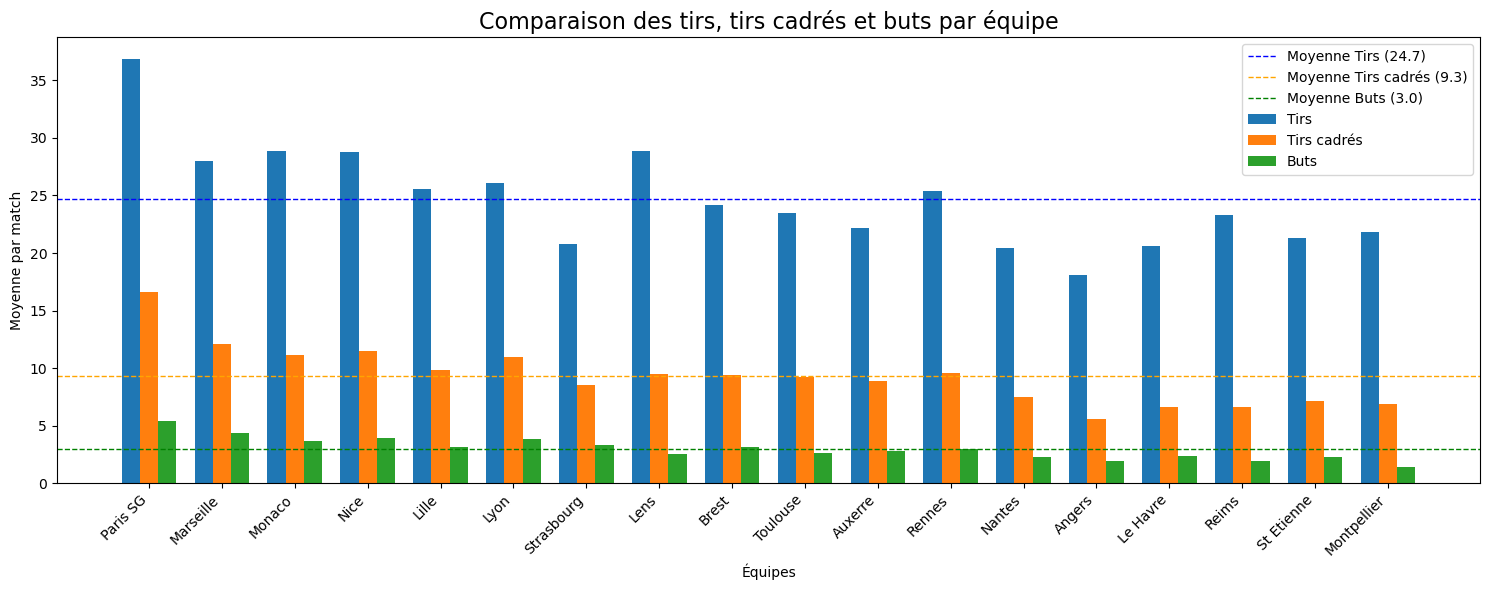

In [106]:
# Calcul des moyennes globales
moyennes_globales = stats.mean()

# Graphique comparatif
fig, ax = plt.subplots(figsize=(15, 6))

# Largeur des barres
width = 0.25
x = np.arange(len(stats))

# Tracer les barres
bar1 = ax.bar(x - width, stats['Tirs_moy'], width, label='Tirs')
bar2 = ax.bar(x, stats['Tirs_cadres_moy'], width, label='Tirs cadrés')
bar3 = ax.bar(x + width, stats['Buts_moy'], width, label='Buts')

# Ajouter des lignes horizontales pour les moyennes globales
ax.axhline(moyennes_globales['Tirs_moy'], color='blue', linestyle='--', linewidth=1, label=f"Moyenne Tirs ({moyennes_globales['Tirs_moy']:.1f})")
ax.axhline(moyennes_globales['Tirs_cadres_moy'], color='orange', linestyle='--', linewidth=1, label=f"Moyenne Tirs cadrés ({moyennes_globales['Tirs_cadres_moy']:.1f})")
ax.axhline(moyennes_globales['Buts_moy'], color='green', linestyle='--', linewidth=1, label=f"Moyenne Buts ({moyennes_globales['Buts_moy']:.1f})")

# Paramètres du graphique
ax.set_title("Comparaison des tirs, tirs cadrés et buts par équipe", fontsize=16)
ax.set_ylabel("Moyenne par match")
ax.set_xlabel("Équipes")
ax.set_xticks(x)
ax.set_xticklabels(stats.index, rotation=45, ha='right')

# Légende
ax.legend()
plt.tight_layout()
plt.show()

Bien que cette analyse soit principalement visuelle, nos données permettent de mieux comprendre le style de jeu des équipes. Dans le haut du tableau, le Paris SG remplit tous les critères : beaucoup de tirs, un pourcentage élevé de tirs cadrés et un nombre de buts très important. L’OM, quant à lui, effectue moins de tentatives mais privilégie la qualité, avec des tirs bien cadrés et un bon rendement en buts. À l’inverse, Angers se crée moins d’occasions, avec peu de tirs cadrés et un nombre réduit de buts. Reims et Montpellier, eux, génèrent davantage d’opportunités, mais cela ne se traduit pas par un grand nombre de buts.

In [119]:
# Ordre exact du classement final
ordre_equipes = [
    "Paris SG", "Marseille", "Monaco", "Nice", "Lille", "Lyon",
    "Strasbourg", "Lens", "Brest", "Toulouse", "Auxerre", "Rennes",
    "Nantes", "Angers", "Le Havre", "Reims", "St Etienne", "Montpellier"
]

# Création des DataFrames points et buts par équipe contre chaque adversaire
teams = df['HomeTeam'].unique()
df_points = pd.DataFrame(0, index=teams, columns=teams)
df_goals = pd.DataFrame(0, index=teams, columns=teams)

for _, row in df.iterrows():
    # Points
    if row['FTR'] == 'H':
        df_points.loc[row['HomeTeam'], row['AwayTeam']] += 3
    elif row['FTR'] == 'A':
        df_points.loc[row['AwayTeam'], row['HomeTeam']] += 3
    else:
        df_points.loc[row['HomeTeam'], row['AwayTeam']] += 1
        df_points.loc[row['AwayTeam'], row['HomeTeam']] += 1
    
    # Buts marqués
    df_goals.loc[row['HomeTeam'], row['AwayTeam']] += row['FTHG']
    df_goals.loc[row['AwayTeam'], row['HomeTeam']] += row['FTAG']

# Création du tableau final
tableau = pd.DataFrame(index=ordre_equipes)

fav, unfav, max_goals, points_fav, points_unfav = [], [], [], [], []

for team in ordre_equipes:
    pts = df_points.loc[team]
    goals = df_goals.loc[team]
    
    # Adversaire favori
    max_pts = pts.max()
    candidates = pts[pts == max_pts].index
    if len(candidates) > 1:
        best = goals[candidates].idxmax()
    else:
        best = candidates[0]
    
    # Adversaire moins favori : exclure le club lui-même et l’adversaire favori
    pts_excl = pts.drop([team, best])
    min_pts = pts_excl.min()
    candidates_min = pts_excl[pts_excl == min_pts].index
    if len(candidates_min) > 1:
        worst = goals[candidates_min].idxmin()
    else:
        worst = candidates_min[0]
    
    # Match avec le plus de buts marqués
    max_goal_match = goals.max()
    
    fav.append(best)
    unfav.append(worst)
    max_goals.append(max_goal_match)
    points_fav.append(pts[best])
    points_unfav.append(pts[worst])

tableau['Adversaire favori'] = fav
tableau['Adversaire moins favori'] = unfav
tableau['Points vs équipe favorite'] = points_fav
tableau['Points vs équipe pas favorite'] = points_unfav

# Affichage
display(tableau)

,Adversaire favori,Adversaire moins favori,Points vs équipe favorite,Points vs équipe pas favorite
Paris SG,Montpellier,Nice,6,1
Marseille,Montpellier,Auxerre,6,0
Monaco,Auxerre,Paris SG,6,0
Nice,St Etienne,Lyon,6,0
Lille,Reims,Paris SG,6,0
Lyon,Le Havre,Monaco,6,0
Strasbourg,Auxerre,Brest,6,1
Lens,Brest,Lille,6,0
Brest,Toulouse,Nice,6,0
Toulouse,Le Havre,Paris SG,6,0


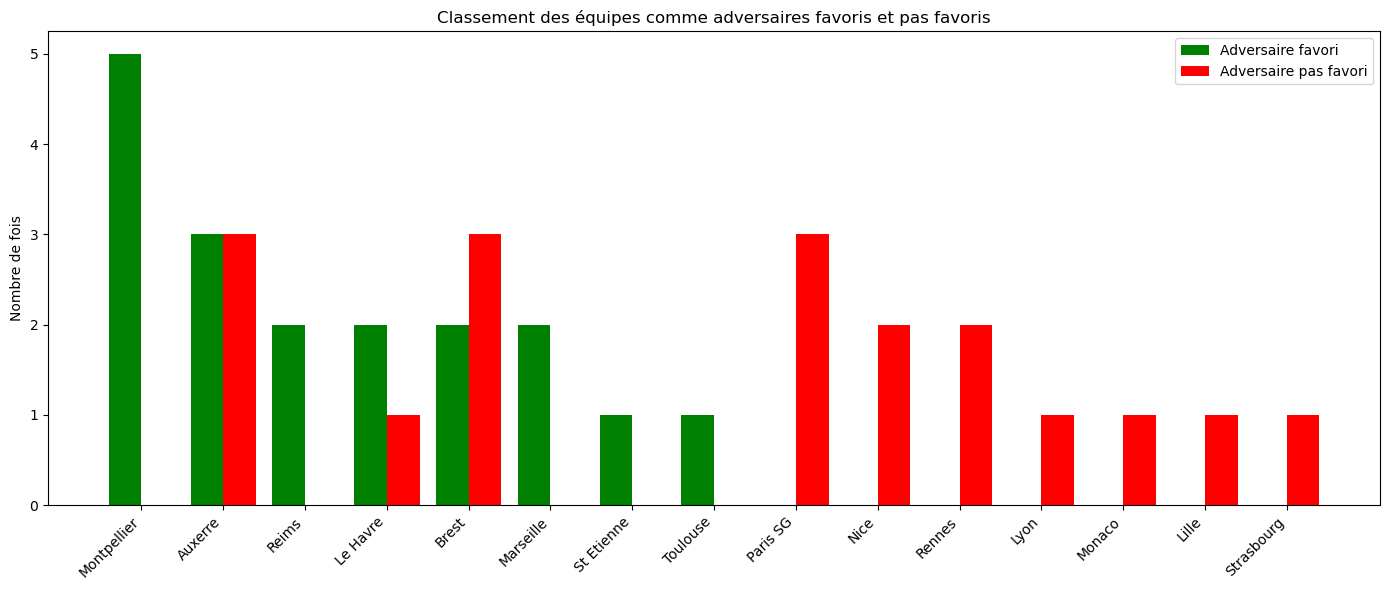

In [121]:
# Comptage des occurrences
fav_counts = tableau['Adversaire favori'].value_counts().rename_axis('Équipe').reset_index(name='Nb fois favorite')
unfav_counts = tableau['Adversaire moins favori'].value_counts().rename_axis('Équipe').reset_index(name='Nb fois pas favorite')

# Fusion pour un graphique côte à côte
merged = pd.merge(fav_counts, unfav_counts, on='Équipe', how='outer').fillna(0)

# Trier par nombre de fois favorite pour un affichage clair
merged = merged.sort_values(by='Nb fois favorite', ascending=False)

# Graphique
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(merged))

plt.bar([i - bar_width/2 for i in x], merged['Nb fois favorite'], width=bar_width, label='Adversaire favori', color='green')
plt.bar([i + bar_width/2 for i in x], merged['Nb fois pas favorite'], width=bar_width, label='Adversaire pas favori', color='red')

plt.xticks(x, merged['Équipe'], rotation=45, ha='right')
plt.ylabel("Nombre de fois")
plt.title("Classement des équipes comme adversaires favoris et pas favoris")
plt.legend()
plt.tight_layout()
plt.show()

Ce tableau met en évidence les performances des équipes face à leurs adversaires favoris et moins favoris.  
Les équipes du haut du classement, comme **Paris SG, Marseille, Monaco, Nice, Lille et Lyon**, obtiennent systématiquement le maximum de points contre leurs adversaires favoris, confirmant leur supériorité.  
À l'inverse, la majorité des équipes n'arrive pas à prendre de points contre leurs adversaires moins favoris, montrant que même des équipes dominantes peuvent être surprenues.  
Quelques exceptions notables sont **Paris SG** et **Strasbourg**, qui réussissent à obtenir un point contre un adversaire moins favori, illustrant leur régularité.  
Enfin, les équipes moins performantes, comme **Montpellier** ou **Reims**, obtiennent peu de points même contre leurs adversaires favoris, ce qui reflète leur position en bas du classement.  
En résumé, gagner contre son adversaire favori est clé pour rester dans le haut du classement, tandis que les matchs contre des équipes moins fortes peuvent produire des résultats inattendus.

# 4) Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;La saison 2024/2025 de la Ligue 1 a mis en lumière que le classement final des équipes résulte d'une combinaison subtile de performance offensive, de discipline défensive et de régularité dans le jeu. Les équipes les mieux classées ont souvent pris l'avantage dès la première mi-temps, réussissant à imposer leur rythme et à concrétiser les occasions générées. Leur capacité à transformer les tirs en buts, et à maintenir la pression sur l'adversaire, s'est traduite par une supériorité visible dans les statistiques de tirs et de tirs cadrés, tant à domicile qu'à l'extérieur.

Le Paris Saint-Germain (PSG), champion incontesté avec 84 points, a dominé le championnat grâce à une attaque prolifique, inscrivant 92 buts, et une défense solide n'encaissant que 35 buts. Leur capacité à marquer en première mi-temps et à maintenir leur avance en seconde période a été un facteur déterminant dans leur succès.

L'Olympique de Marseille, vice-champion avec 65 points, a également montré une solidité impressionnante, inscrivant 74 buts et n'en encaissant que 47. Leur performance à domicile a été particulièrement remarquable, leur permettant de sécuriser des points précieux tout au long de la saison.

D'autres équipes, comme l'AS Monaco et l'OGC Nice, ont également performé au plus haut niveau. Monaco a terminé à la troisième place avec 61 points, affichant une attaque efficace et une défense solide. Nice, quant à lui, a terminé à la quatrième place avec 60 points, grâce à une défense robuste et une attaque opportuniste.

En revanche, des équipes comme le Stade Brestois, Montpellier Hérault SC et l'AS Saint-Étienne ont lutté tout au long de la saison. Malgré des performances offensives parfois prometteuses, leur incapacité à concrétiser les occasions et à maintenir une défense solide les a conduites à la relégation.

En somme, le classement final de la Ligue 1 2024/2025 reflète un équilibre entre maîtrise technique, tactique et régularité psychologique : les équipes qui ont su combiner ces éléments ont récolté les fruits de leur constance, tandis que celles qui ont été moins performantes sur l'ensemble des indicateurs ont payé le prix de leurs lacunes.